combined,1.0,2.0,3.0
tp,,,
Y0_BASELINE_A.mhd,858,4944,5359
Y0_NODULE_FOLLOWUP_3M.mhd,731,116,1017
Y0_NODULE_FOLLOWUP_6M.mhd,77,1,20
Y1_ALWAYS_SCAN_A.mhd,1386,102,167
Y1_NODULE_FOLLOWUP_3M.mhd,268,0,0
Y1_NODULE_FOLLOWUP_6M.mhd,26,0,0
Y1_RANDOMISATION.mhd,2966,16,306
Y2.mhd,2277,0,0
Y2_NODULE_FOLLOWUP_3M.mhd,73,0,0


(5289, 8)

<Axes: >

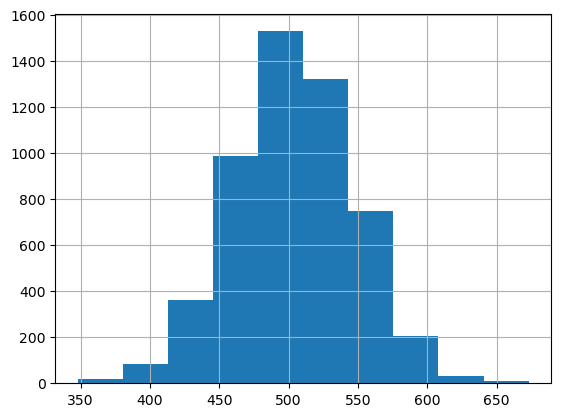

In [47]:
from matplotlib import use
import numpy as np
import pandas as pd


def read_metadata(file_name):
    md = pd.read_csv(file_name)
    md.head()


    return md

lung50_md = read_metadata('lung50_metadata.csv').assign(lung=1)
veolity_md = read_metadata('veolity_metadata.csv').assign(veolity=2)

lung50_md.shape, veolity_md.shape

combined = (
    lung50_md[['scan_id','slices','lung']].merge(
        veolity_md[['scan_id','slices','veolity']],
        how='outer',
        left_on='scan_id',
        right_on='scan_id',
        suffixes=['_1', '_2']
    )
    .fillna(0)
    .assign(tp=lambda df: df.scan_id.str.split('_',n=1).str[-1])
    .assign(diff_in_slices=lambda df: df.slices_1-df.slices_2))


display(pd.crosstab(
    combined.tp,
    combined.combined
))

combined[combined.tp=='Y0_BASELINE_A.mhd'].diff_in_slices.value_counts()

useable = combined[(combined.tp=='Y0_BASELINE_A.mhd')&(combined.diff_in_slices==0)]

display(useable.shape)
useable.slices_1.hist()